# <font color='#2F4F4F'>1. Defining the Question</font>

## a) Specifying the Data Analysis Question

What is the question or problem you are trying to solve?

I am building a model that predicts an accurate delivery time, from picking up a package, to arriving at the final destination.

## b) Defining the Metric for Success

How will you know your project has succeeded?

When i am able to create a model that is able to predict an accurate delivery time with high accuracy score. i.e of 90%.



## c) Understanding the context 

What is the background information surrounding the research question?

Logistics in Sub-Saharan Africa increases the cost of manufactured goods by up to 320%; while in Europe, it only accounts for up to 90% of the manufacturing cost. Sendy is a business-to-business platform established in 2014, to enable businesses of all types and sizes to transport goods more efficiently across East Africa. The company is headquartered in Kenya with a team of more than 100 staff, focused on building practical solutions for Africa’s dynamic transportation needs, from developing apps and web solutions to providing dedicated support for goods on the move.

## d) Recording the Experimental Design

What steps will you take to answer the research question?

1.	Defining the Research Question 
2.	Data Importation 
3.	Data Cleaning 
4.	Data Analysis (Univariate and Bivariate) 
5.	Data Preparation 
6.	Data Modeling 
7.	Model Evaluation
8.	Challenging your Solution
9.	Recommendations


## e) Data Relevance

Is the data provided relevant to the research question?

The dataset provided is appropriate and relevant to the research question.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [1]:
# load libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline


In [2]:
# load dataset
df = pd.read_csv('https://bit.ly/3deaKEM')

df.head(5)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [3]:
df.shape

(21201, 29)

In [4]:
# load glossary
glossary = pd.read_csv('VariableDefinitions (2).csv')
glossary

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a platform
1,Vehicle Type,"For this competition limited to bikes, however in practice Sendy service extends to trucks and vans"
2,Platform Type,"Platform used to place the order, there are 4 types"
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was placed
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order was confirmed by a rider


From what I can tell, our target variable is 'Time from Pickup to Arrival' as it can help us predict the estimated time of delivery of orders, from the
point of driver pickup to the point of arrival at the final destination.

Using the glossary, we will remove the following variables either because they are not needed:
-Order No
-NaN


In [5]:
# dropping unneeded columns
df = df.drop(columns = ['Order No' ])
df.shape

(21201, 28)

In [6]:
df.columns

Index(['User Id', 'Vehicle Type', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [7]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(21201, 28)

In [8]:
# checking for missing values
df.isnull().sum()

User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time                    0
Distance (KM)                  

'Precipitation in millimeters' has missing values for more than half of the records so we will drop that variable. As for Temperature, we will replace null values with mean of the column.

In [9]:
df.drop(columns = ['Precipitation in millimeters'], inplace = True)


In [10]:
# filling the missing values in the Temperature Column with the mean of that column
#Finding the mean of the Temperature column 
mean_value_temp=df['Temperature'].mean()
  
# Replace NaNs in column Temperature with the mean_value_temp

df['Temperature'].fillna(value=mean_value_temp, inplace=True)


In [11]:
# checking to see if we have null values in the data set
df.isna().sum()

User Id                                      0
Vehicle Type                                 0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature                                  0
Pickup Lat   

In [12]:
# check datatypes
df.dtypes

User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)      int64
Arrival at Destination - Time                 

In [13]:
# check unique values in each variable to ensure there is no inconsistency
my_cols = df.columns.to_list()

for col in my_cols:
    print("Variable:", col)
    print("Number of unique values:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: User Id
Number of unique values: 3186
['User_Id_633' 'User_Id_2285' 'User_Id_265' ... 'User_Id_875'
 'User_Id_2001' 'User_Id_2524']

Variable: Vehicle Type
Number of unique values: 1
['Bike']

Variable: Platform Type
Number of unique values: 4
[3 1 2 4]

Variable: Personal or Business
Number of unique values: 2
['Business' 'Personal']

Variable: Placement - Day of Month
Number of unique values: 31
[ 9 12 30 15 13 14 11 23  2 25 19 28 22 10  3  5 17  8  7 31 24 27 16 26
 18 21  1  4  6 29 20]

Variable: Placement - Weekday (Mo = 1)
Number of unique values: 7
[5 2 1 3 4 6 7]

Variable: Placement - Time
Number of unique values: 15686
['9:35:46 AM' '11:16:16 AM' '12:39:25 PM' ... '4:48:16 PM' '5:02:09 PM'
 '5:06:16 PM']

Variable: Confirmation - Day of Month
Number of unique values: 31
[ 9 12 30 15 13 14 11 23  2 25 19 28 22 10  3  5 17  8  7 31 24 27 16 26
 18 21  1  4  6 29 20]

Variable: Confirmation - Weekday (Mo = 1)
Number of unique values: 7
[5 2 1 3 4 6 7]

Variable: Conf

In [14]:
#Separate categorical and numerical columns in the data frame
numerical_columns = df.columns[df.dtypes !='object']
categorical_columns = df.columns[df.dtypes =='object']

print(numerical_columns)
print(categorical_columns)

Index(['Platform Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)',
       'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat',
       'Destination Long', 'Time from Pickup to Arrival'],
      dtype='object')
Index(['User Id', 'Vehicle Type', 'Personal or Business', 'Placement - Time',
       'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time',
       'Arrival at Destination - Time', 'Rider Id'],
      dtype='object')


In [15]:
#getting the unique values in the categorical columns

df[categorical_columns].nunique().sort_values()

Vehicle Type                         1
Personal or Business                 2
Rider Id                           924
User Id                           3186
Placement - Time                 15686
Pickup - Time                    15690
Arrival at Destination - Time    15725
Confirmation - Time              15742
Arrival at Pickup - Time         15767
dtype: int64

In [16]:
# DROP VEHICLE_TYPE COLUMN, since it has one value 'bike'
df.drop(columns = ['Vehicle Type'], inplace = True)
df.columns

Index(['User Id', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'Time from Pickup to Arrival'],
      dtype='object')

We will encode some of our categorical variables for modeling.

In [17]:
df['Personal or Business'] = df['Personal or Business'].replace({'Business' : '1', 'Personal' : '2'})

df.head()

,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,User_Id_633,3,1,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,User_Id_2285,3,2,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,User_Id_265,3,1,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,User_Id_1402,3,1,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,User_Id_1737,1,2,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [18]:
df.dtypes

User Id                                       object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)      int64
Arrival at Destination - Time                 object
Distance (KM)                                 

There are no other anomalies or inconsistencies with the data so we will now move on to analysis.

# <font color='#2F4F4F'>3. Data Analysis</font>

## 3.1 Univariate Analysis

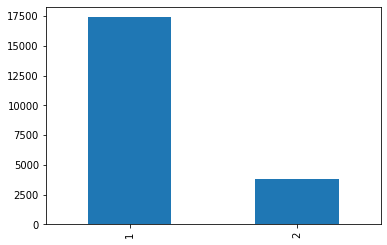

In [19]:
# getting count of personal or business

df['Personal or Business'].value_counts().head(10).plot.bar()

In [20]:
# rename some column names
df.rename(columns = {'Platform Type' : 'Platform_Type', 'Personal or Business' : 'Personal_Business', 'Distance (KM)' : 'Distance'}, inplace = True)

df.head(3)

,User Id,Platform_Type,Personal_Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance,Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,User_Id_633,3,1,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,User_Id_2285,3,2,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,User_Id_265,3,1,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455


3    18054
1     2147
2      980
4       20
Name: Platform_Type, dtype: int64


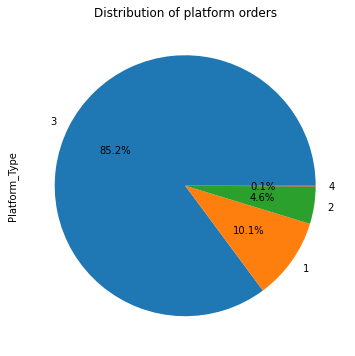

In [21]:
# plotting a pie chart to investigate which platform is highly used to make orders
print(df.Platform_Type.value_counts())
df.Platform_Type.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', figsize = [8, 6])
plt.title("Distribution of platform orders")
plt.show()



platform 3 is used to make most orders.

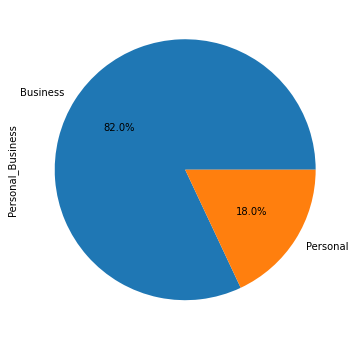

In [22]:
plt.figure(figsize = (6, 6))
labels = ['Business', 'Personal']
df.Personal_Business.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', labels = labels)
plt.show()

Most orders are from businesses

## 3.2 Bivariate Analysis

In [23]:
#rename column 'Time from Pickup to Arrival'


df.rename(columns = {'Time from Pickup to Arrival' : 'arrival_time'}, inplace = True)

df.columns

Index(['User Id', 'Platform_Type', 'Personal_Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'arrival_time'],
      dtype='object')

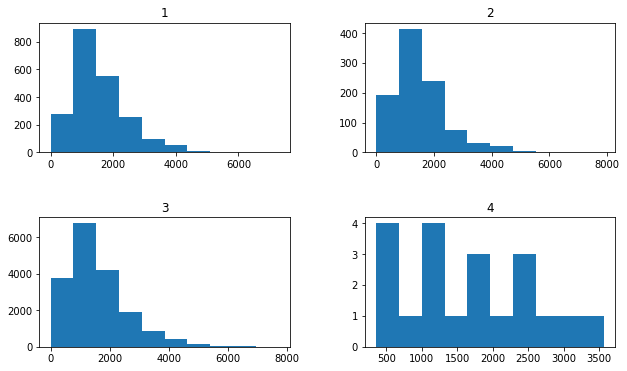

In [24]:
# arrival_time by platform_type
df.hist('arrival_time', by = 'Platform_Type', rot = 0, figsize = (10, 6))
plt.show()

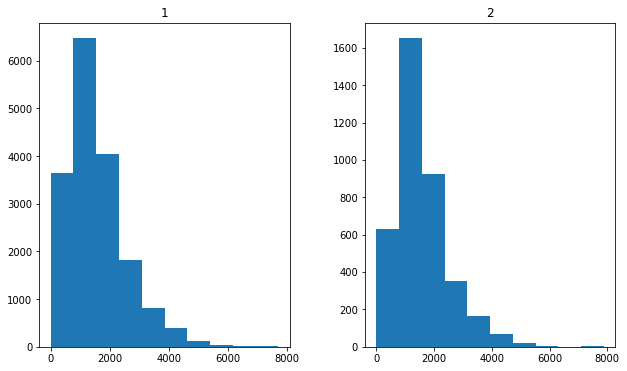

In [25]:
# arrival_time by customer_type
df.hist('arrival_time', by = 'Personal_Business', rot = 0, figsize = (10, 6))
plt.show()

In [26]:
# average arrival time by platform type
df.groupby('Platform_Type')['arrival_time'].mean().sort_values(ascending = False)

Platform_Type
4    1675.150000
1    1572.799721
3    1555.773402
2    1540.861224
Name: arrival_time, dtype: float64

In [27]:
# average distance by platform_type
df.groupby('Platform_Type')['Distance'].mean().sort_values(ascending = False)

Platform_Type
4    13.200000
3     9.522599
1     9.517000
2     9.112245
Name: Distance, dtype: float64

# <font color='#2F4F4F'>4. Data Modeling</font>

###1.Feature Improvement Techniques

In [28]:
df.head(5)

,User Id,Platform_Type,Personal_Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance,Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,arrival_time
0,User_Id_633,3,1,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,User_Id_2285,3,2,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,User_Id_265,3,1,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,User_Id_1402,3,1,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,User_Id_1737,1,2,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [29]:
# split into features (X) and target (Y)

#select  features to use
X = df[['Platform_Type','Personal_Business','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','Distance','Temperature']]  #Independent/predictor variables
y = df['arrival_time'] # Dependent/label variable



In [30]:
# splitting into 75-25 training and test sets
# split the data into training and validation sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [31]:
#view train/test datasets sizes
print('X.shape :', X.shape)
print('X_train.shape :', X_train.shape)
print('X_test.shape :', X_test.shape)

X.shape : (21201, 14)
X_train.shape : (15900, 14)
X_test.shape : (5301, 14)


In [32]:
#Importing the required libraries 
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [33]:
#instantiating the models
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=0)

In [34]:
# Fitting in our models  
svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Evaluating the base model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 834.0184498317975
KNN RMSE: 876.4578305273446
Decision Tree RMSE: 1110.7555697602797


We will be looking into reducing this RMSE values further



1. FUTURE IMPROVEMENTS TECHNIQUES

In [35]:
# Getting a statistical summary of our dataset
df.describe()

,Platform_Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance,Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,arrival_time
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.222006,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.400000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.258889,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.300000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


Data looks fairly distributed.

Normalising the data using the MinMaxScaler from sklearn.preprocessing to scale the numerical values to the range.

In [36]:
X_train.select_dtypes(include = np.number)

,Platform_Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance,Temperature
9591,3,4,2,4,2,4,2,4,2,4,2,4,19.5
19017,3,18,1,18,1,18,1,18,1,18,1,8,29.5
6484,1,27,4,27,4,27,4,27,4,27,4,2,22.6
9480,3,9,6,9,6,9,6,9,6,9,6,7,19.9
7405,3,31,3,31,3,31,3,31,3,31,3,6,26.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,1,30,1,30,1,30,1,30,1,30,1,8,22.4
19648,3,20,3,20,3,20,3,20,3,20,3,11,28.4
9845,1,28,1,28,1,28,1,28,1,28,1,3,22.7
10799,3,20,4,20,4,20,4,20,4,20,4,10,22.3


In [37]:
# scaling our features

# Performing normalisation
  
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)


Converting the distance in KMs to Meters, then inserting a 'Speed' column in the dataset which is a calculation of distance in meters/time in seconds

In [38]:
# Performing standardisation
from sklearn.preprocessing import StandardScaler

#instantiate scaler object
Standard_scaler = StandardScaler()

#'Fitting the scaler to the data by computing the range of values for each numeric column in the X_train and X_test datasets
Standard_scaler.fit(X_train)
StandardScaler()

#Scaling the dataset using the transform method of scaler.
# transform the training data
X_train_scalednew = Standard_scaler.transform(X_train)
# transform the test data
X_test_scalednew = Standard_scaler.transform(X_test)
X_train_scalednew.max()
# X_test.max()

6.931740762264179

In [39]:
#drop columns not in use 
df.drop(columns = ['User Id','Rider Id','Arrival at Destination - Time','Pickup - Time','Arrival at Pickup - Time','Placement - Time','Confirmation - Time','Pickup - Time','Arrival at Destination - Time'], inplace = True)
df.columns


Index(['Platform_Type', 'Personal_Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'arrival_time'],
      dtype='object')

###2.Feature Construction

create a new column speed i.e distance/time.  Convert km's to meters. 
Distance is in metres (m) and time is in seconds (s),

In [40]:
#using a function to compute speed and rename distance and time columns
def speed(df):
    df['Speed'] = (1000 *df.Distance) /(df.arrival_time)
    return df

In [41]:
#call speed function to df
speed(df)
df.head(3)

,Platform_Type,Personal_Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance,Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,arrival_time,Speed
0,3,1,9,5,9,5,9,5,9,5,9,5,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,745,5.369128
1,3,2,12,5,12,5,12,5,12,5,12,5,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,1993,8.028098
2,3,1,30,2,30,2,30,2,30,2,30,2,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,455,6.593407


In [42]:
df.shape

(21201, 20)

In [43]:
#joining new column Speed to X dataset
sub_df = df["Speed"]
merged_df = X.join(sub_df)
merged_df.head(3)

,Platform_Type,Personal_Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance,Temperature,Speed
0,3,1,9,5,9,5,9,5,9,5,9,5,4,20.400000,5.369128
1,3,2,12,5,12,5,12,5,12,5,12,5,16,26.400000,8.028098
2,3,1,30,2,30,2,30,2,30,2,30,2,3,23.258889,6.593407


###3.Wrapper Method: Recursive Feature Elimination 

In [44]:
# Creating a model by performing standardization, and then perfoming feature selection - Wrapper Method: Recursive Feature Selection
# ---

# Selecting the features 
X = df[['Platform_Type','Personal_Business','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','Distance','Temperature','Speed']]
y = df['arrival_time']

# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 27)
 
# Performing standardisation
from sklearn.preprocessing import StandardScaler

#instantiate scaler object
Standard_scaler = StandardScaler() 

#fit the scaler
Standard_scaler.fit(X_train)

# transform the training&test data ie Scaling the dataset using the transform method of scaler.
X_train = Standard_scaler.transform(X_train)
X_test = Standard_scaler.transform(X_test)

# Fitting in our models   

svm_regressor = SVR(kernel="linear")   
dec_regressor = DecisionTreeRegressor(random_state=27)

# We want to select the best 2 features for our model. 
# NB: n_features_to_select will include the response variable
# ---
#  
from sklearn.feature_selection import RFE

svm_regressor = RFE(svm_regressor, n_features_to_select = 3, step=1)
dec_regressor = RFE(dec_regressor, n_features_to_select = 3, step=1)

svm_regressor.fit(X_train, y_train) 
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test) 
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model  
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred))) 
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))
 
# Displaying our best features
print('SVM Selected features: %s' % list(X.columns[svm_regressor.support_]))
print('Decision Tree Selected features: %s' % list(X.columns[dec_regressor.support_]))

SVM RMSE: 831.2846860292967
Decision Tree RMSE: 75.58259182769481
SVM Selected features: ['Personal_Business', 'Distance', 'Speed']
Decision Tree Selected features: ['Arrival at Destination - Day of Month', 'Distance', 'Speed']


###Observations
The RFE was used to select the features (columns) in the training dataset that are most relevant in predicting the target variable arrival_time.

1) using the algorithm SVM, the selected features are 'Personal_Business', 'Distance', 'Speed'

2) using the algorithm Decision Tree, the Selected features are: ['Arrival at Destination - Day of Month', 'Distance', 'Speed')


# <font color='#2F4F4F'>6. Recommendations</font>

What recommendations can you provide?

Generally RMSE scrores improved after performing feature engineering
85% of the orders were made via one of the 4 platforms.
Feature engineering improves the performance of a machine learning model.

# <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?
Yes


#### b) Did we have the right data?
yes

#### c) What can be done to improve the solution?


We can still perform futherm odel opmization techiniques i.e. data cleaning, feature engineering, checking for model assumptions, etc.to further get the best classifier.

### 7.1 Improving the Solution

We can use cross validation and K-Folds cross validation in an attempt to improve our models.

Perform more feature engineering

Hyperparameter tuning

Get more data to train